In [10]:
# import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dnn_utils import *

In [11]:
# get the dataset
try:
    train_data = pd.read_csv("./dataset/train.csv").values
    test_data = pd.read_csv("./dataset/test.csv").values
except IOError:
    raise Exception("File does not exist")

X_train, Y_temp, X_test = train_data[:, 1:], train_data[:, 0], test_data[:]
Y_train = np.zeros((X_train.shape[0], 10))
Y_temp = Y_temp.reshape(X_train.shape[0], 1)

for i in range(X_train.shape[0]):
    Y_train[i][Y_temp[i]-1] = 1

In [12]:
# Explore the dataset
print("X_train shape:" + str(X_train.shape))
print("Y_train shape:" + str(Y_train.shape))
print("X_test shape:" + str(X_test.shape))

X_train shape:(42000, 784)
Y_train shape:(42000, 10)
X_test shape:(28000, 784)


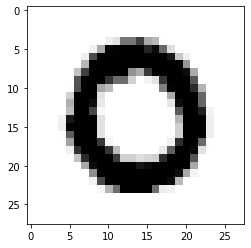

In [13]:
# see any image of the dataset
i = 1
img = X_train[i, :]
img = img.reshape(28, 28)
plt.imshow(255-img, cmap='gray')

In [14]:
# Reshape the dataset
X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.T

# Standardize data to have feature values between 0 and 1.
X_train = X_train/255.
X_test = X_test/255.
print("X_train shape:" + str(X_train.shape))
print("Y_train shape:" + str(Y_train.shape))
print("X_test shape:" + str(X_test.shape))

X_train shape:(784, 42000)
Y_train shape:(10, 42000)
X_test shape:(784, 28000)


In [15]:
# define the layers of the model
layer_dims = [784, 40, 20, 10] # 3-layer model

In [16]:
# define the model
def model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 2000, print_cost = False):
    costs = []
    
    parameters = initialize_parameters(layers_dims)
    
    for i in range(num_iterations):
        
        # Forward propagation
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost
        cost = compute_cost(AL, Y)
        
        # Backward propagation
        grads = L_model_backward(AL, Y, caches)
        
        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" %(i, cost))
            costs.append(cost)
            
    #plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 2.318552
Cost after iteration 100: 2.081278
Cost after iteration 200: 1.833922
Cost after iteration 300: 1.578168
Cost after iteration 400: 1.329036
Cost after iteration 500: 1.106238
Cost after iteration 600: 0.930757
Cost after iteration 700: 0.803852
Cost after iteration 800: 0.713562
Cost after iteration 900: 0.647719
Cost after iteration 1000: 0.597936
Cost after iteration 1100: 0.559043
Cost after iteration 1200: 0.527826
Cost after iteration 1300: 0.502250
Cost after iteration 1400: 0.480930
Cost after iteration 1500: 0.462901
Cost after iteration 1600: 0.447455
Cost after iteration 1700: 0.434076
Cost after iteration 1800: 0.422354
Cost after iteration 1900: 0.411987


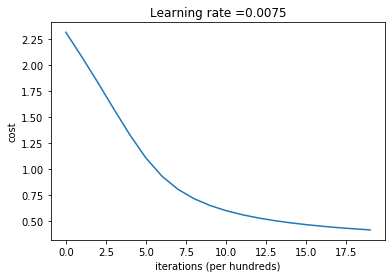

In [17]:
# train the model with the dataset values
parmeters = model(X_train, Y_train, layer_dims, num_iterations = 2000, print_cost = True)

In [18]:
# finding training set accuracy
pred_train = predict(X_train, parmeters)
ans = np.where(Y_temp.T == pred_train)[0].size
    
print("Accuracy: "  + str(ans / X_train.shape[1]))

Accuracy: 0.8901190476190476


In [19]:
# get test set predictions
pred_test = predict(X_test, parmeters)

The model predicted it as: 2


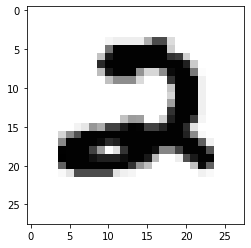

In [41]:
# check the predictions
i = 0
img = X_test[:, i]
img = img.reshape(28, 28)
plt.imshow(255-img, cmap='gray')

print("The model predicted it as: %i" %pred_test[:,i])